La diferencia con '4.2-KNN applied to '4-Analysis of Results' (etiquetando previo con k-means)' es que acá vamos a eliminar: 
* 1 posición entera (HCM Consultant 2).
* 1 candidata (Data_Scientist_Karla_Lewis). 

Y luego de entrenar nuestro modelo vamos a PREDECIR con estas posición "HCM Consultant 2" para todos los Candidatos y con la Candidata "Data_Scientist_Karla_Lewis" (simulamos agregar una posición y una candidata). 

In [2]:
import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np
import string
import math

#Importamos el DF que exportamos previamente a csv en "Cleaning_DS_v2":
DF_Jobs_and_Candidates = pd.read_csv('DF_Exportado_Jobs_And_Candidates.csv')
DF_Jobs_and_Candidates.head()

,Candidate_Name,Content_CV,clean_Content_CV,tokens_Content_CV,Job_Title,Job_Description,clean_Job_Description,tokens_Job_Description,Keywords,Cosine_Job_Desc,WMD_Job_Desc
0,Data_Scientist_Karla_Lewis,\nKARLA LEWIS\nData Scientist\nCONTACT WORK EX...,karla lewis data scientist contact work experi...,"['karla', 'lewis', 'data', 'scientist', 'conta...",Data Scientist,"master’s degree or above in a stem field, incl...",master degree stem field including limited com...,"['master', 'degree', 'stem', 'field', 'includi...","master’s, degree, or, above, in, a, stem, fiel...",0.139,0.489
1,Data_Scientist_Karla_Lewis,\nKARLA LEWIS\nData Scientist\nCONTACT WORK EX...,karla lewis data scientist contact work experi...,"['karla', 'lewis', 'data', 'scientist', 'conta...",Data Scientist 2,"\nreporting to the director, data & analytics,...",reporting director data analytics senior data ...,"['reporting', 'director', 'data', 'analytics',...","projects, techniques, skills, organization’s, ...",0.210,0.494
2,Data_Scientist_Karla_Lewis,\nKARLA LEWIS\nData Scientist\nCONTACT WORK EX...,karla lewis data scientist contact work experi...,"['karla', 'lewis', 'data', 'scientist', 'conta...",HCM Consultant,\nthe oracle cloud hcm absence consultant will...,oracle cloud hcm absence consultant responsibl...,"['oracle', 'cloud', 'hcm', 'absence', 'consult...","requirements, experience, work, consulting, co...",0.085,0.480
3,Data_Scientist_Karla_Lewis,\nKARLA LEWIS\nData Scientist\nCONTACT WORK EX...,karla lewis data scientist contact work experi...,"['karla', 'lewis', 'data', 'scientist', 'conta...",HCM Consultant 2,4+ years of experience in peoplesoft or oracle...,years experience peoplesoft oracle ebs impleme...,"['year', 'experience', 'peoplesoft', 'oracle',...","*, project, management, &, experience, stakeho...",0.058,0.475
4,Data_Scientist_Karla_Lewis,\nKARLA LEWIS\nData Scientist\nCONTACT WORK EX...,karla lewis data scientist contact work experi...,"['karla', 'lewis', 'data', 'scientist', 'conta...",Machine Learning Engineer,leveraging the latest machine and deep learnin...,leveraging latest machine deep learning techni...,"['leveraging', 'latest', 'machine', 'deep', 'l...","experience, projects, leveraging, latest, tech...",0.118,0.485


In [45]:
#Nos quedamos con las columnas necesarias:
DF_J_and_C = DF_Jobs_and_Candidates.loc[:, ['Candidate_Name', 'Job_Title', 'Cosine_Job_Desc', 'WMD_Job_Desc']]
DF_J_and_C

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc
0,Data_Scientist_Karla_Lewis,Data Scientist,0.139,0.489
1,Data_Scientist_Karla_Lewis,Data Scientist 2,0.210,0.494
2,Data_Scientist_Karla_Lewis,HCM Consultant,0.085,0.480
3,Data_Scientist_Karla_Lewis,HCM Consultant 2,0.058,0.475
4,Data_Scientist_Karla_Lewis,Machine Learning Engineer,0.118,0.485
...,...,...,...,...
95,Web_Dev_Karen_Higgins,Machine Learning Engineer 2,0.158,0.496
96,Web_Dev_Karen_Higgins,Security Specialist,0.154,0.501
97,Web_Dev_Karen_Higgins,Security Specialist 2,0.115,0.486
98,Web_Dev_Karen_Higgins,Web Developer Full Stack,0.188,0.490


## Armamos un DF aparte con la posición HCM Consultant 2 y sus valores para cada Candidato.
## Y eliminamos sus filas de 'DF_J_and_C'.


In [46]:
#Filtramos el puesto HCM Consultant 2:
is_HCM_Consultant_2 =  DF_J_and_C['Job_Title']=='HCM Consultant 2'
DF_HCM_C_2 = DF_J_and_C[is_HCM_Consultant_2]
DF_HCM_C_2

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc
3,Data_Scientist_Karla_Lewis,HCM Consultant 2,0.058,0.475
13,Data_Scientist_Rahul_Malik,HCM Consultant 2,0.075,0.474
23,HCM_Federico_Calonge,HCM Consultant 2,0.447,0.518
33,HCM_Robert_Smith,HCM Consultant 2,0.283,0.505
43,ML_Engineer_Bradly_Johnston,HCM Consultant 2,0.178,0.501
53,ML_Engineer_Jonathon_Price,HCM Consultant 2,0.155,0.492
63,Security_Specialist_Ahmed Wayne,HCM Consultant 2,0.195,0.499
73,Security_Specialist_Denis Banik,HCM Consultant 2,0.127,0.493
83,Web_Dev_Alec_Dionisio,HCM Consultant 2,0.105,0.487
93,Web_Dev_Karen_Higgins,HCM Consultant 2,0.142,0.493


In [47]:
new_df_withouth_HCM_CONS_2 =  DF_J_and_C[(DF_J_and_C['Job_Title']!='HCM Consultant 2')]
new_df_withouth_HCM_CONS_2

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc
0,Data_Scientist_Karla_Lewis,Data Scientist,0.139,0.489
1,Data_Scientist_Karla_Lewis,Data Scientist 2,0.210,0.494
2,Data_Scientist_Karla_Lewis,HCM Consultant,0.085,0.480
4,Data_Scientist_Karla_Lewis,Machine Learning Engineer,0.118,0.485
5,Data_Scientist_Karla_Lewis,Machine Learning Engineer 2,0.101,0.480
...,...,...,...,...
95,Web_Dev_Karen_Higgins,Machine Learning Engineer 2,0.158,0.496
96,Web_Dev_Karen_Higgins,Security Specialist,0.154,0.501
97,Web_Dev_Karen_Higgins,Security Specialist 2,0.115,0.486
98,Web_Dev_Karen_Higgins,Web Developer Full Stack,0.188,0.490


## Armamos un DF aparte con la Candidata Data_Scientist_Karla_Lewis y sus valores para cada Posición.
## Y eliminamos sus filas de 'DF_J_and_C'.. 

In [48]:
#Filtramos el Candidata ' Data_Scientist_Karla_Lewis':
is_Karla_Lewis =  DF_J_and_C['Candidate_Name']=='Data_Scientist_Karla_Lewis'
DF_Karla_Lewis = DF_J_and_C[is_Karla_Lewis]
DF_Karla_Lewis

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc
0,Data_Scientist_Karla_Lewis,Data Scientist,0.139,0.489
1,Data_Scientist_Karla_Lewis,Data Scientist 2,0.210,0.494
2,Data_Scientist_Karla_Lewis,HCM Consultant,0.085,0.480
3,Data_Scientist_Karla_Lewis,HCM Consultant 2,0.058,0.475
4,Data_Scientist_Karla_Lewis,Machine Learning Engineer,0.118,0.485
5,Data_Scientist_Karla_Lewis,Machine Learning Engineer 2,0.101,0.480
6,Data_Scientist_Karla_Lewis,Security Specialist,0.033,0.470
7,Data_Scientist_Karla_Lewis,Security Specialist 2,0.051,0.475
8,Data_Scientist_Karla_Lewis,Web Developer Full Stack,0.063,0.466
9,Data_Scientist_Karla_Lewis,Web Developer Full Stack 2,0.061,0.480


In [49]:
new_df_withouth_HCM_CONS_2_and_Karla =  new_df_withouth_HCM_CONS_2[(new_df_withouth_HCM_CONS_2['Candidate_Name']!='Data_Scientist_Karla_Lewis')]
new_df_withouth_HCM_CONS_2_and_Karla

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc
10,Data_Scientist_Rahul_Malik,Data Scientist,0.160,0.491
11,Data_Scientist_Rahul_Malik,Data Scientist 2,0.209,0.495
12,Data_Scientist_Rahul_Malik,HCM Consultant,0.092,0.482
14,Data_Scientist_Rahul_Malik,Machine Learning Engineer,0.146,0.492
15,Data_Scientist_Rahul_Malik,Machine Learning Engineer 2,0.105,0.484
...,...,...,...,...
95,Web_Dev_Karen_Higgins,Machine Learning Engineer 2,0.158,0.496
96,Web_Dev_Karen_Higgins,Security Specialist,0.154,0.501
97,Web_Dev_Karen_Higgins,Security Specialist 2,0.115,0.486
98,Web_Dev_Karen_Higgins,Web Developer Full Stack,0.188,0.490


In [15]:
DF_J_and_C = new_df_withouth_HCM_CONS_2_and_Karla
DF_J_and_C

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc
10,Data_Scientist_Rahul_Malik,Data Scientist,0.160,0.491
11,Data_Scientist_Rahul_Malik,Data Scientist 2,0.209,0.495
12,Data_Scientist_Rahul_Malik,HCM Consultant,0.092,0.482
14,Data_Scientist_Rahul_Malik,Machine Learning Engineer,0.146,0.492
15,Data_Scientist_Rahul_Malik,Machine Learning Engineer 2,0.105,0.484
...,...,...,...,...
95,Web_Dev_Karen_Higgins,Machine Learning Engineer 2,0.158,0.496
96,Web_Dev_Karen_Higgins,Security Specialist,0.154,0.501
97,Web_Dev_Karen_Higgins,Security Specialist 2,0.115,0.486
98,Web_Dev_Karen_Higgins,Web Developer Full Stack,0.188,0.490


### Aplicamos k-means:

In [207]:
#1ro un ejemplo de kmeans (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html):
from sklearn.cluster import KMeans
import numpy as np

#Suponemos X nuestro DF con 2 features para entrenar KNN:
#Por ejemplo 1,1,1,10,10,10 es uno de nuestros features.
             #y 2,4,0,2,4,0 es el otro de nuestros features.
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])

#Ahora entrenamos kmeans con 2 clusters (k = 2):
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

#Y luego de entrenarlo obtenemos nuestros labels (nuestros resultados: a qué k pertenece cada vector
#que definimos arriba en "X")

kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [208]:
#Ahora vamos a predecir con nuevos 2 nuevos valores/vectores:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0], dtype=int32)

In [209]:
#Vemos la posición en X e Y de nuestros 2 centroides:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

### Ahora si, a nuestro ejemplo concreto:

In [16]:
#Librerias:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [17]:
#X y Y son nuestros FEATURES:
X = np.array(DF_J_and_C["Cosine_Job_Desc"])
Y = np.array(DF_J_and_C['WMD_Job_Desc'])
Y.shape

Data = {'x': X,
        'y': Y
       }
  
df = DataFrame(Data,columns=['x','y'])

In [18]:
#Entrenamos Kmeans con todo nuestro DF:
#(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')[source]¶

kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
print(kmeans.labels_)

[[0.34828571 0.51385714]
 [0.13996552 0.49265517]
 [0.1905     0.498     ]
 [0.4935     0.552     ]
 [0.0866     0.48244   ]]
[1 2 4 1 4 4 4 4 4 1 2 0 2 1 1 4 4 4 1 4 2 1 1 4 4 1 4 0 3 2 3 3 2 1 2 1 0
 3 1 3 3 1 4 4 1 1 1 1 2 4 0 0 4 2 4 4 4 2 1 0 0 1 4 4 4 4 1 1 1 4 2 1 1 1
 1 2 1 1 1 2 2]


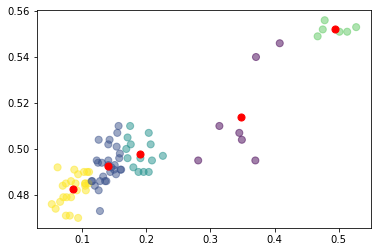

In [19]:
#Ploteamos los centroides de cada grupo:

plt.scatter(df['x'], df['y'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, label = 'centroids')
plt.show()

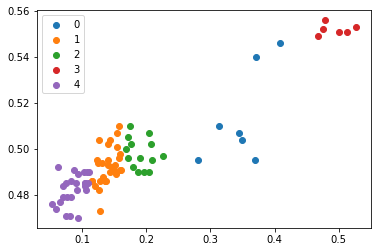

In [20]:
#Ploteamos cada grupo:

fig, ax = plt.subplots()
scatter_x = np.array(DF_J_and_C["Cosine_Job_Desc"])
scatter_y = np.array(DF_J_and_C['WMD_Job_Desc'])
group = np.array(kmeans.labels_)
for g in np.unique(group):
    i = np.where(group == g)
    ax.scatter(scatter_x[i], scatter_y[i], label=g)
ax.legend()
plt.show()

In [21]:
#Añadimos la columna al DF:
new_column =  kmeans.labels_
DF_J_and_C['Result K-means'] = new_column
DF_J_and_C

<ipython-input-21-fa9fc6aa1310>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_J_and_C['Result K-means'] = new_column


,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc,Result K-means
10,Data_Scientist_Rahul_Malik,Data Scientist,0.160,0.491,1
11,Data_Scientist_Rahul_Malik,Data Scientist 2,0.209,0.495,2
12,Data_Scientist_Rahul_Malik,HCM Consultant,0.092,0.482,4
14,Data_Scientist_Rahul_Malik,Machine Learning Engineer,0.146,0.492,1
15,Data_Scientist_Rahul_Malik,Machine Learning Engineer 2,0.105,0.484,4
...,...,...,...,...,...
95,Web_Dev_Karen_Higgins,Machine Learning Engineer 2,0.158,0.496,1
96,Web_Dev_Karen_Higgins,Security Specialist,0.154,0.501,1
97,Web_Dev_Karen_Higgins,Security Specialist 2,0.115,0.486,1
98,Web_Dev_Karen_Higgins,Web Developer Full Stack,0.188,0.490,2


In [23]:
DF_J_and_C.tail(20)

new_df =  DF_J_and_C[(DF_J_and_C['Result K-means']==3) | (DF_J_and_C['Result K-means']==0)]
new_df

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc,Result K-means
22,HCM_Federico_Calonge,HCM Consultant,0.370,0.495,0
40,ML_Engineer_Bradly_Johnston,Data Scientist,0.408,0.546,0
41,ML_Engineer_Bradly_Johnston,Data Scientist 2,0.501,0.551,3
44,ML_Engineer_Bradly_Johnston,Machine Learning Engineer,0.478,0.556,3
45,ML_Engineer_Bradly_Johnston,Machine Learning Engineer 2,0.527,0.553,3
50,ML_Engineer_Jonathon_Price,Data Scientist,0.371,0.540,0
51,ML_Engineer_Jonathon_Price,Data Scientist 2,0.513,0.551,3
54,ML_Engineer_Jonathon_Price,Machine Learning Engineer,0.475,0.552,3
55,ML_Engineer_Jonathon_Price,Machine Learning Engineer 2,0.467,0.549,3
66,Security_Specialist_Ahmed Wayne,Security Specialist,0.314,0.510,0


## 2-Aplicando KNN.

In [24]:
#En X colocamos únicamente las features numéricas 'Cosine_Job_Desc' y 'WMD_Job_Desc' para predecir la variable Y.
x_data = DF_J_and_C.drop(["Candidate_Name","Job_Title","Result K-means"],axis=1)

#En Y colocaremos nuestra variable a predecir / nuestro "target", 'Result K-means':
y = DF_J_and_C['Result K-means']

In [25]:
x_data

,Cosine_Job_Desc,WMD_Job_Desc
10,0.160,0.491
11,0.209,0.495
12,0.092,0.482
14,0.146,0.492
15,0.105,0.484
...,...,...
95,0.158,0.496
96,0.154,0.501
97,0.115,0.486
98,0.188,0.490


In [26]:
y

10    1
11    2
12    4
14    1
15    4
     ..
95    1
96    1
97    1
98    2
99    2
Name: Result K-means, Length: 81, dtype: int32

In [27]:
#KNN librerias:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Entrenamiento... separamos 20% test y 80% para entrenamiento:
X_train,X_test,y_train,y_test = train_test_split(x_data,y,test_size=0.2,random_state=4)

In [30]:
#seleccionar el K óptimo para utilizar nuestro algoritmo. Para esto entrenamos al algoritmo K veces 
#y nos quedamos con el modelo que nos dé la mejor predicción (el mejor score).

#Como vimos previamente, dependiendo del valor de K el algoritmo se compartaba de mejor o peor manera. 
#Vamos a realizar un barrido para los distintos valores de K (del 1 al 25).
#Y así, para cada uno de estos valores de K vamos a entrenar al algoritmo y así vamos a obtener la exactitud/score del algoritmo:

k_range = range(1,15) #Valores de K (1-25)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k) #Llamamos al modelo de clasificación (KNN) y le pasamos cada valor de K. 
        knn.fit(X_train,y_train) #Se va a entrenar al algorimo para ese K con los x_train e Y_train que elegimos previamente.
        y_pred=knn.predict(X_test) #Y ahora hacemos una predicción con los X_Test... lo mismo que haciamos con RL.
        scores[k] = metrics.accuracy_score(y_test,y_pred) #Después calculamos y guardamos el score de esa predicción con ese valor de K.
        scores_list.append(scores[k]) #Y esa predicción la metemos en una lista.

Text(0, 0.5, 'Testing Accuracy')

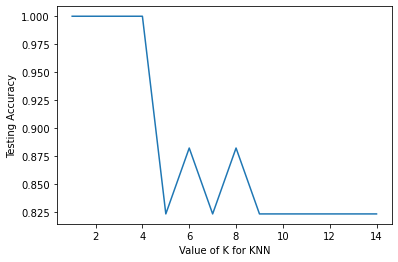

In [31]:
#Ahora graficamos y vemos la relación entre los K y la exactitud/score del algoritmo:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [236]:
#Elegimos un K=2 ya que vemos que allí la eficiencia es del 0,95% (Alta) y nuestro algoritmo predecirá bien.

### Entrenamos al algoritmo de KNN con un K óptimo (K=3)

In [32]:
k_Optimo=3
knn = KNeighborsClassifier(n_neighbors=k_Optimo) #Le asignamos este k=2.
knn.fit(X_train,y_train) #Se va a entrenar al algorimo para ese K=2 con los x_train
#e Y_train que elegimos previamente.
y_pred=knn.predict(X_test) #Y ahora hacemos una predicción con los X_Test.
score = metrics.accuracy_score(y_test,y_pred) #Cálculo del score para k=2

print("Precisión de KNN con K optimo:",score) #printeamos el score.

Precisión de KNN con K optimo: 1.0


##### 3-¿Qué pasa al añadir un nuevo Candidato (Data_Scientist_Karla_Lewis)? ¿Qué se tiene que volver a calcular?
##### DF_Karla_Lewis

In [51]:
#Al agregar un nuevo candidato (aplica al puesto) se calcula el WMD y Cosine y se PREDICE con este modelo de KNN. 
#En esta predicción te clasifica de acuerdo a las 5 categorías que creamos con k-means.

#DF_Karla_Lewis

x_predict_karla = DF_Karla_Lewis.drop(["Candidate_Name","Job_Title"],axis=1)
x_predict_karla

y_pred=knn.predict(x_predict_karla)
y_pred

array([1, 2, 4, 4, 1, 4, 4, 4, 4, 4], dtype=int32)

In [54]:
len(y_pred)

10

In [56]:
#Añadimos la columna al DF:
new_column =  y_pred
DF_Karla_Lewis['Result KNN'] = new_column
DF_Karla_Lewis

<ipython-input-56-4a07ab06c151>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Karla_Lewis['Result KNN'] = new_column


,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc,Result KNN
0,Data_Scientist_Karla_Lewis,Data Scientist,0.139,0.489,1
1,Data_Scientist_Karla_Lewis,Data Scientist 2,0.210,0.494,2
2,Data_Scientist_Karla_Lewis,HCM Consultant,0.085,0.480,4
3,Data_Scientist_Karla_Lewis,HCM Consultant 2,0.058,0.475,4
4,Data_Scientist_Karla_Lewis,Machine Learning Engineer,0.118,0.485,1
5,Data_Scientist_Karla_Lewis,Machine Learning Engineer 2,0.101,0.480,4
6,Data_Scientist_Karla_Lewis,Security Specialist,0.033,0.470,4
7,Data_Scientist_Karla_Lewis,Security Specialist 2,0.051,0.475,4
8,Data_Scientist_Karla_Lewis,Web Developer Full Stack,0.063,0.466,4
9,Data_Scientist_Karla_Lewis,Web Developer Full Stack 2,0.061,0.480,4


##### 4-¿Qué pasa al añadir un nuevo Job Description (HCM Consultant 2)? ¿Qué se tiene que volver a calcular?

##### DF_HCM_C_2

In [58]:
#No pasa nada hasta que un Candidato aplica al puesto... y ahi pasa lo exṕlicado anteriormente en el punto 3 (justo arriba VER)

#DF_HCM_C_2

x_predict_HCM_C_2 = DF_HCM_C_2.drop(["Candidate_Name","Job_Title"],axis=1)
x_predict_HCM_C_2

#x_predict_HCM_C_2

y_pred=knn.predict(x_predict_HCM_C_2)
y_pred

array([4, 4, 3, 0, 2, 1, 2, 1, 4, 1], dtype=int32)

In [59]:
#Añadimos la columna al DF:
new_column =  y_pred
DF_HCM_C_2['Result KNN'] = new_column
DF_HCM_C_2

<ipython-input-59-eb53d5f9647a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_HCM_C_2['Result KNN'] = new_column


,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc,Result KNN
3,Data_Scientist_Karla_Lewis,HCM Consultant 2,0.058,0.475,4
13,Data_Scientist_Rahul_Malik,HCM Consultant 2,0.075,0.474,4
23,HCM_Federico_Calonge,HCM Consultant 2,0.447,0.518,3
33,HCM_Robert_Smith,HCM Consultant 2,0.283,0.505,0
43,ML_Engineer_Bradly_Johnston,HCM Consultant 2,0.178,0.501,2
53,ML_Engineer_Jonathon_Price,HCM Consultant 2,0.155,0.492,1
63,Security_Specialist_Ahmed Wayne,HCM Consultant 2,0.195,0.499,2
73,Security_Specialist_Denis Banik,HCM Consultant 2,0.127,0.493,1
83,Web_Dev_Alec_Dionisio,HCM Consultant 2,0.105,0.487,4
93,Web_Dev_Karen_Higgins,HCM Consultant 2,0.142,0.493,1


In [60]:
#Conclusión: me dieron resultados esperables las predicciones.